In [14]:
using Revise
includet("easyLinearRegression.jl")
includet("reichweiten_mod.jl")
using .Reichweiten


In [15]:
results_of = Vector{Reichweiten.Result}(undef, 4)

4-element Vector{Result}:
 #undef
 #undef
 #undef
 #undef

Hier wird die Funktion
$$\frac{a}{1+ e^{-b(x-c)}}$$
verwendet

# Luft Ohne Folie <br>

## d1 = 34

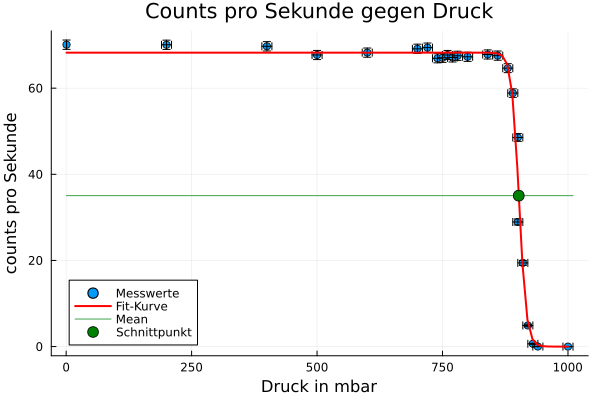

Der Mittlere Druck ist: p = 901.9535468284859+- 0.5403188359149109
Fit-Parameter: 
a = 68.24216236633741 +- 0.8196169007938027
b = -0.13604020517665652 +- 0.016381943844863682
c = 902.3502900047473 +- 0.8482556595331231


Result(901.9535468284859, 0.5403188359149109, [68.24216236633741, -0.13604020517665652, 902.3502900047473], [0.8196169007938027, 0.016381943844863682, 0.8482556595331231], 34.0)

In [16]:
d_1 = 34      #Gewählter Abstand
result_d1 = plot_p_counts("d1.csv", 750.0, d_1, )
results_of[1] = result_d1

## d2  = 35


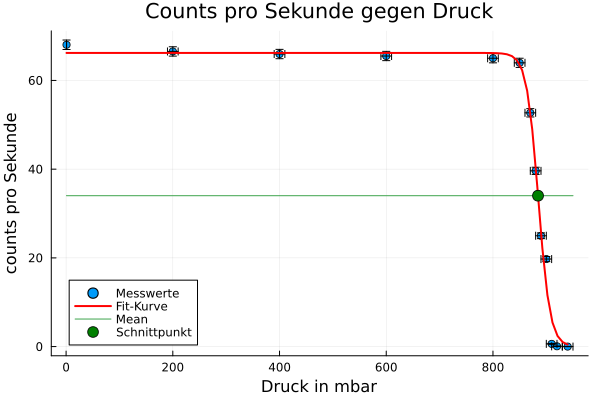

Der Mittlere Druck ist: p = 884.4677725015298+- 0.5265189666310438
Fit-Parameter: 
a = 66.19829581088442 +- 1.229003212131199
b = -0.09123464893799905 +- 0.00959174274632317
c = 885.0755989683912 +- 1.273074786469554


Result(884.4677725015298, 0.5265189666310438, [66.19829581088442, -0.09123464893799905, 885.0755989683912], [1.229003212131199, 0.00959174274632317, 1.273074786469554], 35.0)

In [17]:
d_2 = 35     #Gewählter Abstand
result_d2 = plot_p_counts("d2.csv", 850.0, d_2)
results_of[2] = result_d2


## d3 = 36

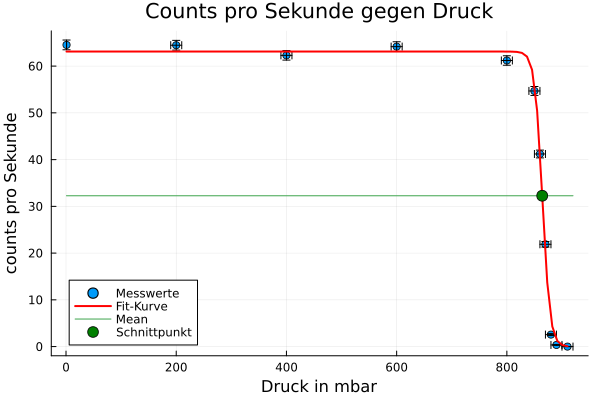

Der Mittlere Druck ist: p = 864.13549524668+- 0.5094932122544258
Fit-Parameter: 
a = 63.113406119067065 +- 0.8574717559329775
b = -0.14523799220293376 +- 0.012466834017224922
c = 864.4453566715443 +- 0.6807135890538587


Result(864.13549524668, 0.5094932122544258, [63.113406119067065, -0.14523799220293376, 864.4453566715443], [0.8574717559329775, 0.012466834017224922, 0.6807135890538587], 36.0)

In [18]:
d_3 = 36      #Gewählter Abstand
result_d3 = plot_p_counts("d3.csv", 850, d_3)
results_of[3] = result_d3

## d4 = 37

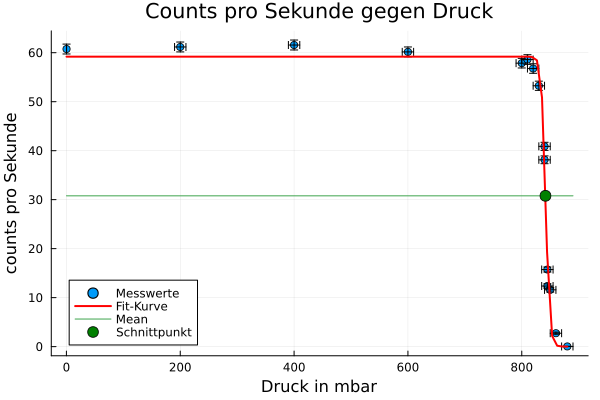

Der Mittlere Druck ist: p = 841.6245433774301+- 0.5048377076953653
Fit-Parameter: 
a = 59.19621280479715 +- 1.1529369188865157
b = -0.2855153152419249 +- 0.041318434562961914
c = 841.9051968794215 +- 0.4564655851211649


Result(841.6245433774301, 0.5048377076953653, [59.19621280479715, -0.2855153152419249, 841.9051968794215], [1.1529369188865157, 0.041318434562961914, 0.4564655851211649], 37.0)

In [19]:
d_4 = 37      #Gewählter Abstand
result_d4 = plot_p_counts("d4.csv", 850, d_4)
results_of[4] = result_d4

# Als nächstes wird $$d(1/\bar{p}) = a \cdot 1/\bar{p} + b$$ berechnet

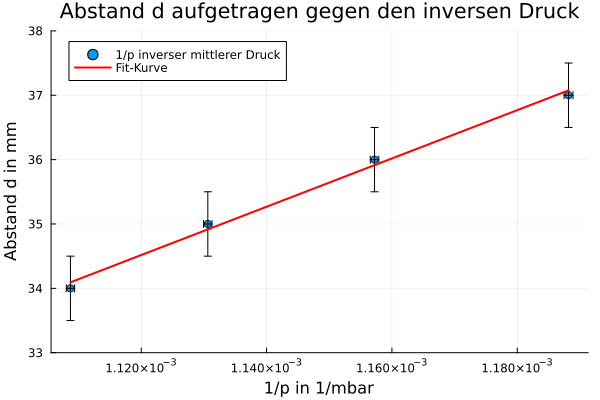

Die Mittlere Reichweite in Luft beträgt: R = 37.03306443522684 +- 1.996126484543034
Fit Paramter: 
a = 37514.49427288479 +- 2022.0761288420933
b = -7.498477449949121 +- 2.3184482020141597


(37.03306443522684, 1.996126484543034)

In [20]:
r_mean = plot_p_over_1_d(results_of, 0.5)

# Mit Folie

## Probe 1 Gold d = 23

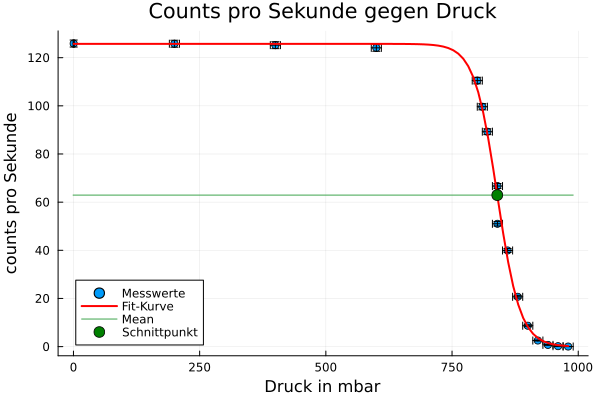

Der Mittlere Druck ist: p = 839.5809568376636+- 0.723945593413084
Fit-Parameter: 
a = 125.7363926436414 +- 1.8491933805022145
b = -0.043992771114813777 +- 0.0027692777582560726
c = 839.6280595222837 +- 1.547183165496295


Result(839.5809568376636, 0.723945593413084, [125.7363926436414, -0.043992771114813777, 839.6280595222837], [1.8491933805022145, 0.0027692777582560726, 1.547183165496295], 23.0)

In [21]:
d_G = 23      #Gewählter Abstand

### Plotte Messergebnisse
results_dG = plot_p_counts("gold.csv", 850,d_G)

## Probe 2, Alu 16mm

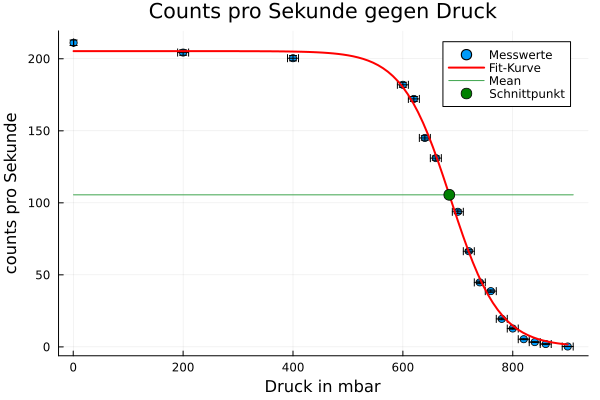

Der Mittlere Druck ist: p = 684.4734402202378+- 0.9226697374708052
Fit-Parameter: 
a = 205.31729596370494 +- 2.4100596351186763
b = -0.022681567929851962 +- 0.0008415226212106294
c = 686.9647503541617 +- 2.219672772282027


Result(684.4734402202378, 0.9226697374708052, [205.31729596370494, -0.022681567929851962, 686.9647503541617], [2.4100596351186763, 0.0008415226212106294, 2.219672772282027], 16.0)

In [22]:
d_A = 16

results_dA = plot_p_counts("alu.csv",630,init_a_param=200, init_b_param = 0.1 ,d_A)


# Impulshöhe

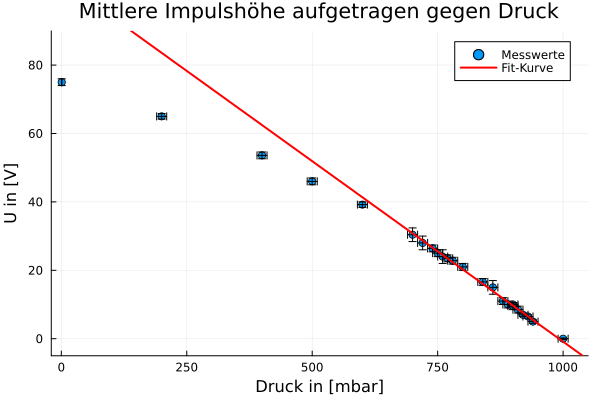

Gefittet mit den 10 letzen Datenpunkten
Fitparameter: 
a = -0.10554282868525897 +- 0.0050358844924553
b = 104.66927290836654 +- 4.5689504747366


Mittlerer Druck: 
p = 991.7232104940312 +- 6.768853477874466


In [77]:

plot_p_U("d1.csv",10)

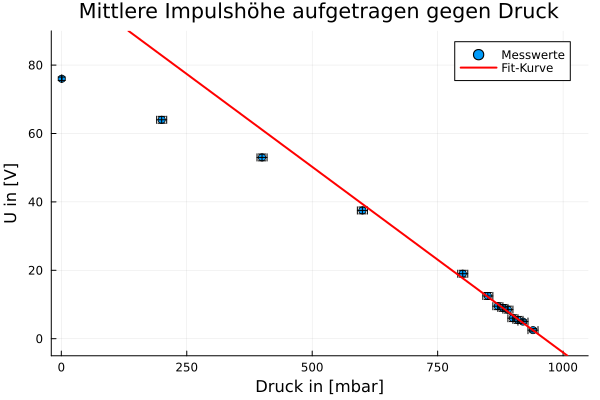

Gefittet mit den 5 letzen Datenpunkten
Fitparameter: 
a = -0.10857142857142857 +- 0.011355795068274745
b = 104.52142857142857 +- 10.298355946658749


Mittlerer Druck: 
p = 962.6973684210527 +- 15.018954739997588


In [78]:
plot_p_U("d2.csv",5)

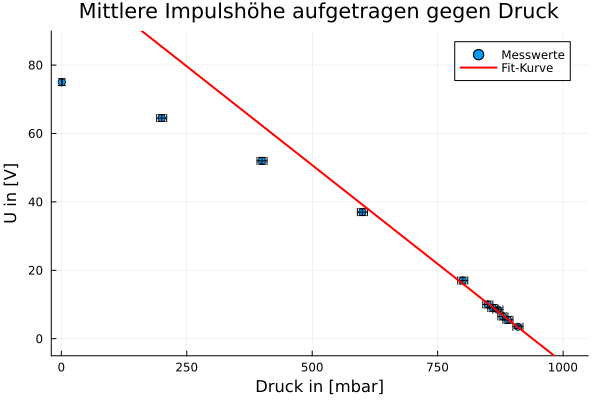

Gefittet mit den 4 letzen Datenpunkten
Fitparameter: 
a = -0.11554054054054054 +- 0.009983855972658334
b = 108.50675675675676 +- 8.807436104112554


Mittlerer Druck: 
p = 939.1228070175439 +- 12.863963628168559


In [79]:
plot_p_U("d3.csv",4)

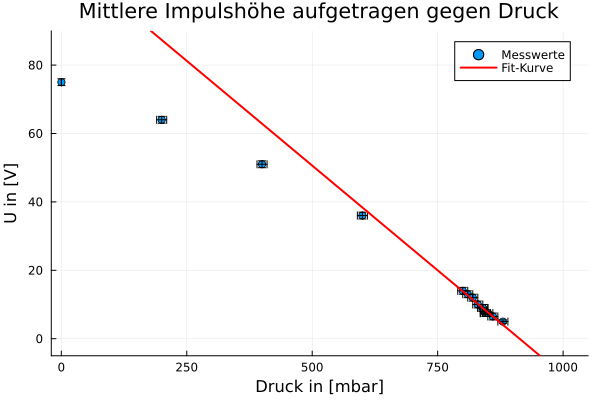

Gefittet mit den 10 letzen Datenpunkten
Fitparameter: 
a = -0.12248888888888888 +- 0.007956865882848597
b = 111.84977777777777 +- 6.671506483542132


Mittlerer Druck: 
p = 913.1422351233672 +- 9.864082630229388


In [85]:
plot_p_U("d4.csv",10)